# Pandas DataFrame for storing tweet feed (total 12 points)

Creating the following date frame for storing tweets:

- **climate_feed_df** DataFrame for storing tweets
- **retweeted_status_df** for storing original tweets

In [1]:
import pandas as pd
import numpy as np
import nltk
import re
import requests
from bs4 import BeautifulSoup as bsp
import ast

The pickle files retweeted_status_df.pkl and climate_feed.pkl should be in the same folder as this notebook.
If needed, they can also be downloaded by uncommenting the commands below.

In [2]:
#!wget https://github.com/psnegi/data_science_tools1/raw/master/hws/retweeted_status_df.pkl

In [3]:
#!wget https://github.com/psnegi/data_science_tools1/raw/master/hws/climate_feed.pkl

<font color= "red">Click on these links if the above downloads fail. </font>


https://github.com/psnegi/data_science_tools1/raw/master/hws/climate_feed.pkl

https://github.com/psnegi/data_science_tools1/raw/master/hws/retweeted_status_df.pkl

Keep these pickle files in the same directory as the notebook

In [4]:
retweeted_status_df = pd.read_pickle("./retweeted_status_df.pkl")

In [5]:
retweeted_status_df.head(3)

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,scopes,source,text,truncated,user
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,None,Sat Feb 09 20:27:45 +0000 2019,"{'hashtags': [], 'user_mentions': [], 'urls': ...",NaN,99.0,False,None,1.094332e+18,1094332044052549633,...,NaN,NaN,NaN,81.0,False,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",The National Party declares war on the Glouces...,True,"{'default_profile': False, 'protected': False,..."
2,NaN,None,Sat Feb 09 23:56:18 +0000 2019,"{'hashtags': [], 'user_mentions': [], 'urls': ...",NaN,6.0,False,None,1.094385e+18,1094384528267902977,...,"{'favorited': False, 'favorite_count': 2642, '...",1.093999e+18,1093998640392220673,5.0,False,NaN,"<a href=""http://twitter.com/download/android"" ...",This is the same idiot who thought\nThe southe...,False,"{'default_profile': False, 'protected': False,..."


In [6]:
#climate_feed_df.to_pickle("./climate_feed.pkl")
climate_feed_df = pd.read_pickle("./climate_feed.pkl")
climate_feed_df.head(2)

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user_id
0,None,None,Sun Feb 10 00:17:31 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,0,False,None,1094389867499405313,1094389867499405313,...,NaN,NaN,NaN,0,False,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",.@SteveKingIA says he's unsure about the scien...,True,31476142
1,None,None,Sun Feb 10 00:17:30 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,0,False,None,1094389862193455105,1094389862193455105,...,NaN,NaN,NaN,81,False,1.094332e+18,"<a href=""http://tapbots.com/tweetbot"" rel=""nof...",RT @RobOakeshott1: The National Party declares...,False,996782298


Here are dtypes for climate_feed_df. We'll work with only
- entities to extract hashtags
- retweeted_status in case we need to extract original full tweet
- truncated
- text: tweet text
- created_at
- user_id

Some of them have wrong datatypes.

In [7]:
climate_feed_df.dtypes

contributors                  object
coordinates                   object
created_at                    object
entities                      object
extended_entities             object
favorite_count                object
favorited                     object
geo                           object
id                            object
id_str                        object
in_reply_to_screen_name       object
in_reply_to_status_id         object
in_reply_to_status_id_str     object
in_reply_to_user_id           object
in_reply_to_user_id_str       object
is_quote_status               object
lang                          object
metadata                      object
place                         object
possibly_sensitive            object
quoted_status                 object
quoted_status_id              object
quoted_status_id_str          object
retweet_count                 object
retweeted                     object
retweeted_status             float64
source                        object
t

# Q1 (points .5) Replace None with nan in climate_feed_df. Also display some random rows.


In [8]:
climate_feed_df.replace({'None' : np.nan}, inplace=True)
climate_feed_df.sample(7)

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user_id
5088,NaN,NaN,Sat Feb 09 22:34:10 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,0,False,NaN,1094363859123650562,1094363859123650562,...,NaN,NaN,NaN,350,False,1.094335e+18,"<a href=""http://twitter.com/#!/download/ipad"" ...",RT @SiddonsDan: “Does God’s creation not inclu...,False,1014322812
6794,NaN,NaN,Sat Feb 09 22:00:21 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,0,False,NaN,1094355348222144512,1094355348222144512,...,NaN,NaN,NaN,2,False,1.093872e+18,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @JuBeatz: I'd rather take my chances on the...,False,996583509295681537
7718,NaN,NaN,Sat Feb 09 21:42:24 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,0,False,NaN,1094350828419203072,1094350828419203072,...,NaN,NaN,NaN,1646,False,1.093564e+18,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @SenKamalaHarris: We must urgently address ...,False,899068965569282050
3921,NaN,NaN,Sat Feb 09 23:00:44 +0000 2019,"{'hashtags': [{'indices': [112, 126], 'text': ...",NaN,0,False,NaN,1094370541644009473,1094370541644009473,...,NaN,NaN,NaN,1,False,1.094333e+18,"<a href=""http://twitter.com/download/iphone"" r...",RT @hobodiac: No more shinny? Thousands of lak...,False,343801640
5100,NaN,NaN,Sat Feb 09 22:34:00 +0000 2019,"{'hashtags': [{'indices': [64, 77], 'text': 'G...",NaN,0,False,NaN,1094363815905513477,1094363815905513477,...,NaN,NaN,NaN,0,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",@shaunking @AOC Nothing against @AOC but ppl s...,True,872237097926709248
9663,NaN,NaN,Sat Feb 09 21:04:07 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...","{'media': [{'source_user_id_str': '17850785', ...",0,False,NaN,1094341196837720064,1094341196837720064,...,NaN,NaN,NaN,749,False,1.093876e+18,"<a href=""http://twitter.com/download/android"" ...",RT @larrykim: 👏Elon Musk has released all of T...,False,979130517437153281
6220,NaN,NaN,Sat Feb 09 22:11:54 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,0,False,NaN,1094358253910310912,1094358253910310912,...,NaN,NaN,NaN,306,False,1.094062e+18,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","RT @ericswalwell: Climate change is real, and ...",False,1007726427465306112


 ### Given code: Working with only selected attributes.

In [9]:
climate_feed_df = climate_feed_df[['created_at', 'entities','retweeted_status', 'truncated', 'user_id', 'text' ]].copy()

In [10]:
climate_feed_df.sample(3)

,created_at,entities,retweeted_status,truncated,user_id,text
4895,Sat Feb 09 22:38:48 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",1.094061e+18,False,3034805810,RT @ChristopherNFox: Kudos to the nearly 60 Me...
5281,Sat Feb 09 22:30:25 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",1.094354e+18,False,716749184821399553,RT @michaeldaleyMP: A government led by me wil...
735,Sun Feb 10 00:02:27 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",1.094356e+18,False,2426459444,RT @NPR: Whale poop is... bright orange? With ...


# Q2 (points .5 =.25+.25) convert
- created_at to date time type
- truncated to bool type.


In [11]:
# Date format prior: Sat Feb 09 23:02:41 +0000 2019, I had to look up the docs for the things below:
# %a weekday abbreviation, %b month abbreviation, %d day of month as a 0-padded decimal, %z UTC offset

climate_feed_df['created_at'] =pd.to_datetime(climate_feed_df['created_at'], format='%a %b %d %H:%M:%S %z %Y')
climate_feed_df['truncated'] = climate_feed_df['truncated'].astype('bool')
climate_feed_df.sample(2)

,created_at,entities,retweeted_status,truncated,user_id,text
1253,2019-02-09 23:53:10+00:00,"{'hashtags': [], 'user_mentions': [{'id_str': ...",1.094383e+18,True,830996244801613824,RT @FalwenJo: @littlelibtard @mitchellvii Exce...
4102,2019-02-09 22:57:42+00:00,"{'hashtags': [], 'user_mentions': [{'id_str': ...",1.094242e+18,True,24961695,"RT @molratty: ""Cows blur the line between trag..."


Checking datatype again

In [12]:
climate_feed_df.dtypes

created_at          datetime64[ns, UTC]
entities                         object
retweeted_status                float64
truncated                          bool
user_id                           int64
text                             object
dtype: object

# Q3(points .5) In climate_feed_df, calculate the number of NAN values in various columns

In [13]:
climate_feed_df.isna().sum()


created_at             0
entities               0
retweeted_status    2690
truncated              0
user_id                0
text                   0
dtype: int64

We'll use **ast** module to parse string to python dictionary

# Q4(points 1=.5+.5) Using *ast* module  convert entities to python dictionary. This dictionary should contain hashtags and user_mentions
 - Create a column named hashtags. Values in this columns should be comma separated values of **text** attribute in **hashtags**  value.
 - Create a column named user_mentions. Values in this columns should be comma separated values of **name** attribute in **user_mentions** values.

In [14]:
# This question is a bit vague and hard to see what he wants.
# I believe hes asking us to parse whats in the entities column,
# taking the value of hashtags and turning that into a new column

#heres what the first entry looks like
print(climate_feed_df['entities'][0])

#its of type:
print(type(climate_feed_df['entities'][0]))

# testing the AST module on a single row
climate_feed_df['entities'] = climate_feed_df['entities'].apply(lambda x:ast.literal_eval(x) if isinstance(x, str) else x)

{'hashtags': [], 'user_mentions': [{'id_str': '48117116', 'name': 'Steve King', 'screen_name': 'SteveKingIA', 'indices': [1, 13], 'id': 48117116}], 'urls': [{'indices': [117, 140], 'url': 'https://t.co/J1CcrQZkB2', 'display_url': 'twitter.com/i/web/status/1…', 'expanded_url': 'https://twitter.com/i/web/status/1094389867499405313'}], 'symbols': []}
<class 'str'>


In [15]:
print(f" {climate_feed_df['entities'][2519]['hashtags']}")
print(f"{climate_feed_df['entities'][0]['user_mentions']}")

 [{'indices': [31, 36], 'text': 'SOTU'}]
[{'id_str': '48117116', 'name': 'Steve King', 'screen_name': 'SteveKingIA', 'indices': [1, 13], 'id': 48117116}]


In [16]:
climate_feed_df['entities'][2519]['hashtags'][0]['text']
climate_feed_df['entities'][2519]['user_mentions'][0]['name']

'Amy Klobuchar'

In [17]:
# Applying this to the entire dataframe
temp_df = pd.DataFrame()
temp_hash_list = []
temp_name_list = []
for i in climate_feed_df['entities']:
    if i['hashtags'] != []:
        temp_hash_list.append(i['hashtags'][0]['text'])
    else:
        temp_hash_list.append(np.nan)
    if i['user_mentions'] != []:
        temp_name_list.append(i['user_mentions'][0]['name'])
    else:
        temp_name_list.append(np.nan)
temp_df['hashtags'] = temp_hash_list
temp_df['user_mentions'] = temp_name_list

In [18]:
# joining the two dataframes
climate_feed_df = pd.concat([climate_feed_df, temp_df], axis=1)

In [19]:
# checking an entry
climate_feed_df.iloc[2519]

created_at                                  2019-02-09 23:29:38+00:00
entities            {'hashtags': [{'indices': [31, 36], 'text': 'S...
retweeted_status                                1093539877470306304.0
truncated                                                        True
user_id                                                      21157573
text                RT @amyklobuchar: Missing from #SOTU? Any ment...
hashtags                                                         SOTU
user_mentions                                           Amy Klobuchar
Name: 2519, dtype: object

In [20]:
climate_feed_df.sample(5)

,created_at,entities,retweeted_status,truncated,user_id,text,hashtags,user_mentions
5925,2019-02-09 22:18:04+00:00,"{'hashtags': [], 'user_mentions': [], 'urls': ...",NaN,True,18700306,"Sir, the only climate change going on is the c...",NaN,NaN
568,2019-02-10 00:05:48+00:00,"{'hashtags': [], 'user_mentions': [], 'urls': ...",NaN,True,102545744,a strange thing about climate change is that i...,NaN,NaN
6551,2019-02-09 22:05:02+00:00,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,True,249724722,"A new study calls for ""universal auto access"" ...",NaN,CityLab
3558,2019-02-09 23:08:42+00:00,"{'hashtags': [{'indices': [39, 54], 'text': 'P...",1.094102e+18,True,1611864877,RT @ImranKhanPTI: We are launching our #Plant4...,Plant4Pakistan,Imran Khan
2299,2019-02-09 23:34:00+00:00,"{'hashtags': [{'indices': [28, 39], 'text': 'h...",1.094324e+18,True,924035400649363457,"RT @WRIClimate: These days, #hurricanes in the...",hurricanes,WRI Climate


# Cleaning tweets

Let's see some random tweets

In [21]:
tweet_length= 280
pd.set_option('max_colwidth', 2*tweet_length)
climate_feed_df['text'].sample(7)

1759       RT @nytimes: Speedskating on natural ice is a beloved Dutch national pastime, and the Elfstedentocht race is the apex of that tradition. Bu…
7613                                                           RT @jesstaras: Good morning to everyone except anti-vaxxers and climate change deniers 🌞
9216    RT @Education4Libs: Nancy Pelosi excluded Alexandria Ocasio-Cortez from the new Climate Change Committee.\n\nLmao....\n\nThat moment you're so…
3165       @saravindraj We have to because there is no other alternative. We are likely staring at an irreversible change in t… https://t.co/GQmJTeOAYH
9343       RT @LauraLynnTT: Advocating for inclusivity while being the ones who  exclude those with differing beliefs is hypocritical. Banning me from…
5916        You know with the new @MikeBloomberg bribery of cities for ‘climate change’ that city is to hire a city worker for… https://t.co/cBS2NydeF5
8457       RT @FiveThirtyEight: In the spring of 2015, 63% of Americans said they believ

**Example of tweet not truncated**

In [22]:
climate_feed_df['text'].loc[3929]

'Fighting climate change without nuclear is a fool’s errand. https://t.co/KPSCk6fjsa'

**Exampe of tweet truncated**

In [23]:
climate_feed_df['text'].loc[3928]

'RT @_Oliver_Yates: If only Abbott could fight as hard for the safety of our country from the impacts of climate change, as he is fighting f…'

Truncated tweet has three horizontal ellipses in it. One can check retweeted_status values and 
use it got the the original tweet text

In [24]:
climate_feed_df.retweeted_status.loc[3928]

1.0943594112863928e+18

In [25]:
retweeted_status_df[retweeted_status_df.id == climate_feed_df.retweeted_status.loc[3928]].text.iloc[0]

'If only Abbott could fight as hard for the safety of our country from the impacts of climate change, as he is fight… https://t.co/OJlsDeFoNA'

There is url above tweet. We can use **requests** to get the complete text.



# Q5(3.5 points, 1 for the use of requests and text extraction from right html element+.5+1+1 for the rest.) Perform following activities for creating a new original_tweet_text field in climate_feed_df. 

Option 1. This question frequently presents a challenge to students. If needed, please use the provided pickle file.
Just uncomment the following cell to import the dataframe.

Option 2. Use twitter API. For this you will need to look at hw 4 to set up the connection and use the "2/tweets/{id}" endpoint.

Either option will work. You will still need to do the cleaning portion of the question for either option you choose.

This is also the documentation link for the api call:
https://developer.twitter.com/en/docs/twitter-api/tweets/lookup/api-reference/get-tweets-id

- If  climate_feed_df has a valid retweeted_status(**it is an id of the record in retweeted_status_df** ), then use retweeted_status_df to get the original text(**retweeted_status_df.text**) otherwise use None(**Ignore the value of climate_feed_df.truncated field for this activity.**).
    + If retweeted_status_df.text has a URL(like https://t.co/RKyppIS5c9 ), use it to get complete text from right html element. 
    
    *If you have a way to figure out that one is not supposed to web scrap this URL don't scrap it.*
    
- Create a new field named **original_tweet_text** in climate_feed_df to store the text extracted from URL(use None if requests to URL fails or any other issues.). Use retweeted_status_df.text if there was no 
 URL.
- From  newly original_tweet_text field remove
    - one or more \n with .(dot)
    - any url(http, https)
    - @user, @user:

*Note that as you will be making a lot of requests call(I/O bound calls), this portion of code can be slow. you may want to test your code on a small number of records first.*

In [26]:
climate_feed_df["retweeted_status"].notna().sum()
print(len(climate_feed_df))
print(len(retweeted_status_df))

9999
9999


In [28]:
# Just testing some things here
test_resp = requests.get('https://twitter.com/i/web/status/1094332044052549633')
soup = bsp(test_resp.text, 'html.parser')
# print(soup.prettify)
# retweeted_status_df['text'].head(2)
# climate_feed_df['text'].head(2)

In [29]:
#if climate_feed_df has a valid retweeted_status get the text otherwise use None.
for i in range(2):
    # first lets get the url
    reg_pat = r'https?://\S+'
    try:
        url = re.findall(reg_pat,retweeted_status_df[retweeted_status_df.id == climate_feed_df.retweeted_status.loc[i]].text.iloc[0])
        if url != []:
            # print(url[0])
            response = requests.get(url[0])
            # print(response.status_code)
            if response.status_code == 200:
                soup = bsp(response.text, 'html.parser')
                # Something interesting is going on when trying to scrape here,
                # If we look at the soup all the text becomes "something went wrong"
                print(soup.find_all('span', {'class': re.compile("css-901oao*")}))     
            else:
                text = np.nan
        else:
            text = np.nan
    except Exception as ex:
        pass
        #print(ex)
        
print("\nTwitter doesn't seem to let you scrape the text from the html, So I will have to use the truncated text")

[<span class="css-901oao css-16my406 r-poiln3 r-bcqeeo r-qvutc0">Something went wrong, but don’t fret — let’s give it another shot.</span>, <span class="css-901oao css-16my406 css-1hf3ou5 r-poiln3 r-a023e6 r-rjixqe r-bcqeeo r-qvutc0"><span class="css-901oao css-16my406 r-poiln3 r-bcqeeo r-qvutc0">Try again</span></span>, <span class="css-901oao css-16my406 r-poiln3 r-bcqeeo r-qvutc0">Try again</span>]

Twitter doesn't seem to let you scrape the text from the html, So I will have to use the truncated text


# Q 6(point 1= .5+.5) Remove all the references  of RT and  @user: or @user, and url in climate_feed_df text attribute.

In [30]:
# Lets walk through just one row
text = climate_feed_df['text'][0]
type(text)
print(f'original\n{text}\n')
text = re.sub(r"@\w+","", text)
print(f"After removing @ \n{text}\n")
text = re.sub(r'http\S+',"", text)
print(f"After removing url:\n {text}")

original
.@SteveKingIA says he's unsure about the science of climate change. But you don’t need to be a scientist to take ac… https://t.co/J1CcrQZkB2

After removing @ 
. says he's unsure about the science of climate change. But you don’t need to be a scientist to take ac… https://t.co/J1CcrQZkB2

After removing url:
 . says he's unsure about the science of climate change. But you don’t need to be a scientist to take ac… 


In [31]:
# lets make a function to do this
def remove_things(tweet):
    tweet = re.sub(r"@\w+","", tweet)
    tweet = re.sub(r'http\S+',"", tweet)
    tweet = tweet.replace("RT", '')
    tweet = re.sub(r'[^A-Za-z.]+', ' ', tweet)
    tweet = tweet.strip()
    return tweet

#test on the row
remove_things(climate_feed_df['text'][0])

'. says he s unsure about the science of climate change. But you don t need to be a scientist to take ac'

In [32]:
# Apply ^ to entire column in the df
climate_feed_df['text']= climate_feed_df['text'].apply(remove_things)
climate_feed_df.head(2)

,created_at,entities,retweeted_status,truncated,user_id,text,hashtags,user_mentions
0,2019-02-10 00:17:31+00:00,"{'hashtags': [], 'user_mentions': [{'id_str': '48117116', 'name': 'Steve King', 'screen_name': 'SteveKingIA', 'indices': [1, 13], 'id': 48117116}], 'urls': [{'indices': [117, 140], 'url': 'https://t.co/J1CcrQZkB2', 'display_url': 'twitter.com/i/web/status/1…', 'expanded_url': 'https://twitter.com/i/web/status/1094389867499405313'}], 'symbols': []}",NaN,True,31476142,. says he s unsure about the science of climate change. But you don t need to be a scientist to take ac,NaN,Steve King
1,2019-02-10 00:17:30+00:00,"{'hashtags': [], 'user_mentions': [{'id_str': '16777464', 'name': 'Rob Oakeshott', 'screen_name': 'RobOakeshott1', 'indices': [3, 17], 'id': 16777464}], 'urls': [], 'symbols': []}",1.094332e+18,True,996782298,The National Party declares war on the Gloucester community because they stood up for themselves and won. Remember the,NaN,Rob Oakeshott


# Q 7 (2 point) Create a new attribute in climate_feed_df named *final_tweet_text*. If *original_tweet_text* is None  then use climate_feed_df.text otherwise use *original_text_tweet* if initial words matched with *climate_feed_df.text* words. If words don't match use climate_feed_df.text

Note that some time after fetching text from a url based on retweeted_status_df.text, we may get different text. We can fix it but for this homework we are ignoring it.

In [33]:
climate_feed_df['final_tweet_text'] = climate_feed_df['text']

# Emoji detection

See this example of emoji as unicode characters

In [34]:
climate_feed_df['final_tweet_text'].loc[3931]

'Oh my god CARBON....... Cue the outrage machine against smartphone. These things are adding to climate change.'

We can use use regex to capture this emoji
https://apps.timwhitlock.info/emoji/tables/unicode

In [35]:
emoji_regex = re.compile(r"\U0001F631", re.UNICODE)

In [36]:
emoji_regex.findall(climate_feed_df['final_tweet_text'].loc[3931])

[]

## I dont see an emoji, likely because I wasnt able to scrape the full text

In [64]:
# im gonna insert one to test my function:
climate_feed_df['final_tweet_text'][3931] = "Oh my god CARBON \U0001f600"
climate_feed_df['final_tweet_text'][3931]

/var/folders/q0/rm2w_k594fx0w2480vcbn59w0000gn/T/ipykernel_78125/669164287.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climate_feed_df['final_tweet_text'][3931] = "Oh my god CARBON \U0001f600"


'Oh my god CARBON 😀'

We'll use emoji library to make this task easier.

Here is some documentation about unicode support in python

https://docs.python.org/3/howto/unicode.html

In [ ]:
# ! pip install emoji

In [37]:
import emoji

In [67]:
# UNICODE_EMOJI was removed in version 2.0.0
# after reading the docs EMOJI_DATA will get me what I need

# Q 8(1 point) Create a column  called *emoji*.  This column should contain a list of tuples for emoji detected in *final_tweet_text*. The first element of the tuple is the emoji detected and second is the text describing the emoji.

In [65]:
# Lets make a func to detect emoji's
def detect_emoji(tweet):
    try:
        return [x for x in tweet if x in emoji.EMOJI_DATA]
    except Exception as ex:
        return ex
climate_feed_df['emoji'] = climate_feed_df['final_tweet_text'].apply(detect_emoji)
climate_feed_df['emoji'][3931]

['😀']

# We will use wordcloud  to do elemetary exploratory data analysis (EDA). We will do some cleanup before using wordcloud.

https://github.com/amueller/word_cloud

In [ ]:
#!pip install wordcloud

In [68]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [69]:
%matplotlib inline

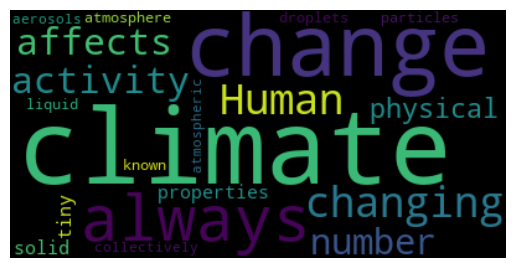

In [70]:
# here is a sample
text = "climate change. Climate is always changing. Human activity also affects climate through changes in the number and physical properties of tiny solid particles and liquid droplets in the atmosphere, known collectively as atmospheric aerosols"
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")


plt.show()

As you can see word size is proportional to frequency of a word and highlight the main keywords in a text.
This gives an idea about the content of the  text.

We can do all the text pre processing or wrangling
 like 

- More Cleaning
- Case conversion
- Spell correction
- Expanding contractions
- Removing stop words
- Morphological normalization
    - Stemming
    - Lemmatization


But for this homework we'll only **do expanding contractions,  stop words removal,  and lemmatization**

# Q 9 (2 = .5+.5+.5+.5 points) Do
- expanding contractions
- stop words removal
- lemmatization
- Use wordcloud to visualize keywords

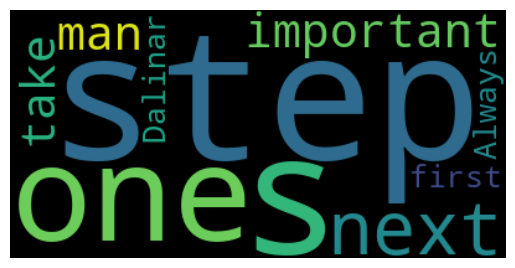

In [84]:
# What text am I even supposed to use? I guess I get to pick?
# Here's a quote from a book I recently finished Oathbringer by brandon sanderson
text = "The most important step a man can take? It’s not the first one, is it? It’s the next one. Always the next step, Dalinar."
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Homework ends
# Final thoughts
We did not do all of the cleanup or used all attributes for EDA. Let us highlight one more cleanup activity related to language.

In [73]:
#! pip install enchant
import enchant

In [77]:
# dictionary = enchant.Dict('en')

In [79]:
# climate_feed_df['text'].loc[5217]

In [78]:
# [dictionary.check(w) for w in  nltk.word_tokenize(climate_feed_df['text'].loc[5217])]